In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py

In [2]:
df = pd.read_csv('data/city_temperature_cleaned.csv')

In [3]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Date,Season
0,Africa,Algeria,Algiers,1,1,1995,17.9,1995-01-01,Winter
1,Africa,Algeria,Algiers,1,2,1995,9.7,1995-01-02,Winter
2,Africa,Algeria,Algiers,1,3,1995,9.3,1995-01-03,Winter
3,Africa,Algeria,Algiers,1,4,1995,8.0,1995-01-04,Winter
4,Africa,Algeria,Algiers,1,5,1995,8.8,1995-01-05,Winter


In [4]:
temp = df
temp.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Date,Season
0,Africa,Algeria,Algiers,1,1,1995,17.9,1995-01-01,Winter
1,Africa,Algeria,Algiers,1,2,1995,9.7,1995-01-02,Winter
2,Africa,Algeria,Algiers,1,3,1995,9.3,1995-01-03,Winter
3,Africa,Algeria,Algiers,1,4,1995,8.0,1995-01-04,Winter
4,Africa,Algeria,Algiers,1,5,1995,8.8,1995-01-05,Winter


In [5]:
df_1995 = df[df.Year == 1995]
df_1995

,Region,Country,City,Month,Day,Year,AvgTemperature,Date,Season
0,Africa,Algeria,Algiers,1,1,1995,17.9,1995-01-01,Winter
1,Africa,Algeria,Algiers,1,2,1995,9.7,1995-01-02,Winter
2,Africa,Algeria,Algiers,1,3,1995,9.3,1995-01-03,Winter
3,Africa,Algeria,Algiers,1,4,1995,8.0,1995-01-04,Winter
4,Africa,Algeria,Algiers,1,5,1995,8.8,1995-01-05,Winter
...,...,...,...,...,...,...,...,...,...
2782185,North America,US,San Juan Puerto Rico,12,27,1995,26.4,1995-12-27,Fall
2782186,North America,US,San Juan Puerto Rico,12,28,1995,27.0,1995-12-28,Fall
2782187,North America,US,San Juan Puerto Rico,12,29,1995,26.0,1995-12-29,Fall
2782188,North America,US,San Juan Puerto Rico,12,30,1995,26.7,1995-12-30,Fall


In [6]:
monthly_avg_1995 = df_1995.groupby(df_1995.Month).mean()
monthly_avg_1995

,Day,Year,AvgTemperature
Month,,,
1,16.005570,1995.0,6.822478
2,14.469926,1995.0,8.023549
3,16.037514,1995.0,11.269077
4,15.491578,1995.0,14.446167
5,15.989659,1995.0,18.561886
6,15.490903,1995.0,21.863396
7,16.018392,1995.0,23.981524
8,15.994003,1995.0,23.827333
9,15.530169,1995.0,19.964004


In [7]:
#temp[''] = np.array(monthly_avg_1995.AvgTemperature)

In [8]:
temp.Day = 1
date = pd.to_datetime(temp[['Year', 'Month', 'Day']])
temp = pd.concat([temp, date], axis=1)
temp.rename(columns={0:'Date_By_Month'}, inplace=True)
temp

,Region,Country,City,Month,Day,Year,AvgTemperature,Date,Season,Date_By_Month
0,Africa,Algeria,Algiers,1,1,1995,17.9,1995-01-01,Winter,1995-01-01
1,Africa,Algeria,Algiers,1,1,1995,9.7,1995-01-02,Winter,1995-01-01
2,Africa,Algeria,Algiers,1,1,1995,9.3,1995-01-03,Winter,1995-01-01
3,Africa,Algeria,Algiers,1,1,1995,8.0,1995-01-04,Winter,1995-01-01
4,Africa,Algeria,Algiers,1,1,1995,8.8,1995-01-05,Winter,1995-01-01
...,...,...,...,...,...,...,...,...,...,...
2787908,North America,US,San Juan Puerto Rico,7,1,2013,28.0,2013-07-27,Summer,2013-07-01
2787909,North America,US,San Juan Puerto Rico,7,1,2013,27.6,2013-07-28,Summer,2013-07-01
2787910,North America,US,San Juan Puerto Rico,7,1,2013,29.0,2013-07-29,Summer,2013-07-01
2787911,North America,US,San Juan Puerto Rico,7,1,2013,28.8,2013-07-30,Summer,2013-07-01


In [9]:
temp.set_index('Date_By_Month', inplace=True)
temp.index = pd.to_datetime(temp.index)
temp

,Region,Country,City,Month,Day,Year,AvgTemperature,Date,Season
Date_By_Month,,,,,,,,,
1995-01-01,Africa,Algeria,Algiers,1,1,1995,17.9,1995-01-01,Winter
1995-01-01,Africa,Algeria,Algiers,1,1,1995,9.7,1995-01-02,Winter
1995-01-01,Africa,Algeria,Algiers,1,1,1995,9.3,1995-01-03,Winter
1995-01-01,Africa,Algeria,Algiers,1,1,1995,8.0,1995-01-04,Winter
1995-01-01,Africa,Algeria,Algiers,1,1,1995,8.8,1995-01-05,Winter
...,...,...,...,...,...,...,...,...,...
2013-07-01,North America,US,San Juan Puerto Rico,7,1,2013,28.0,2013-07-27,Summer
2013-07-01,North America,US,San Juan Puerto Rico,7,1,2013,27.6,2013-07-28,Summer
2013-07-01,North America,US,San Juan Puerto Rico,7,1,2013,29.0,2013-07-29,Summer


In [10]:
global_monthly_avg = temp.groupby(temp.index).mean()
global_monthly_avg

,Month,Day,Year,AvgTemperature
Date_By_Month,,,,
1995-01-01,1,1,1995,6.822478
1995-02-01,2,1,1995,8.023549
1995-03-01,3,1,1995,11.269077
1995-04-01,4,1,1995,14.446167
1995-05-01,5,1,1995,18.561886
...,...,...,...,...
2019-08-01,8,1,2019,24.151440
2019-09-01,9,1,2019,22.172351
2019-10-01,10,1,2019,16.794544


In [11]:
monthly_avg_1995 = monthly_avg_1995.append([monthly_avg_1995]*24, ignore_index=True)
monthly_avg_1995.tail(24)

,Day,Year,AvgTemperature
276,16.005570,1995.0,6.822478
277,14.469926,1995.0,8.023549
278,16.037514,1995.0,11.269077
279,15.491578,1995.0,14.446167
280,15.989659,1995.0,18.561886
281,15.490903,1995.0,21.863396
282,16.018392,1995.0,23.981524
283,15.994003,1995.0,23.827333
284,15.530169,1995.0,19.964004
285,15.996741,1995.0,16.495522


In [12]:
global_monthly_avg['RefTemperature'] = np.array(monthly_avg_1995.AvgTemperature)
global_monthly_avg['Temp_Anomaly'] = global_monthly_avg.AvgTemperature - global_monthly_avg.RefTemperature
global_monthly_avg

,Month,Day,Year,AvgTemperature,RefTemperature,Temp_Anomaly
Date_By_Month,,,,,,
1995-01-01,1,1,1995,6.822478,6.822478,0.000000
1995-02-01,2,1,1995,8.023549,8.023549,0.000000
1995-03-01,3,1,1995,11.269077,11.269077,0.000000
1995-04-01,4,1,1995,14.446167,14.446167,0.000000
1995-05-01,5,1,1995,18.561886,18.561886,0.000000
...,...,...,...,...,...,...
2019-08-01,8,1,2019,24.151440,23.827333,0.324107
2019-09-01,9,1,2019,22.172351,19.964004,2.208346
2019-10-01,10,1,2019,16.794544,16.495522,0.299023


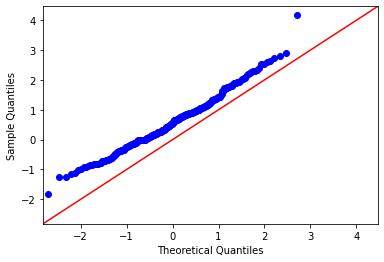

In [13]:
sm.qqplot(global_monthly_avg.Temp_Anomaly, line ='45')
py.show()

<AxesSubplot:xlabel='Temp_Anomaly', ylabel='Count'>

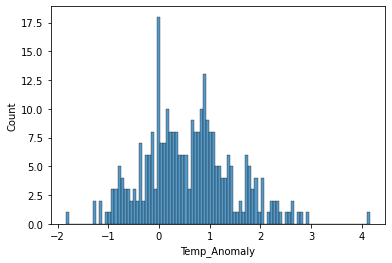

In [14]:
sns.histplot(global_monthly_avg.Temp_Anomaly, bins=100)

<AxesSubplot:xlabel='Date_By_Month'>

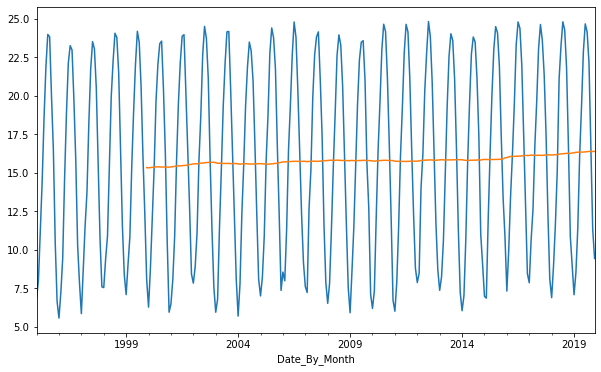

In [15]:
global_monthly_avg.AvgTemperature.plot(figsize=(10,6))
global_monthly_avg.AvgTemperature.rolling(window=60).mean().plot()

<AxesSubplot:xlabel='Date_By_Month'>

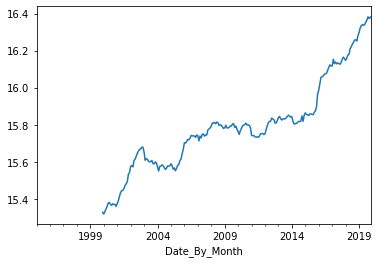

In [16]:
global_monthly_avg.AvgTemperature.rolling(window=60).mean().plot()

<AxesSubplot:xlabel='Date_By_Month'>

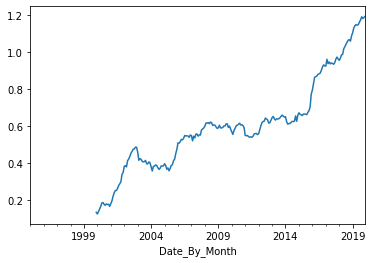

In [17]:
global_monthly_avg.Temp_Anomaly.rolling(window=60).mean().plot()

In [18]:
df_month = global_monthly_avg
df_month.reset_index(inplace=True)
df_month

,Date_By_Month,Month,Day,Year,AvgTemperature,RefTemperature,Temp_Anomaly
0,1995-01-01,1,1,1995,6.822478,6.822478,0.000000
1,1995-02-01,2,1,1995,8.023549,8.023549,0.000000
2,1995-03-01,3,1,1995,11.269077,11.269077,0.000000
3,1995-04-01,4,1,1995,14.446167,14.446167,0.000000
4,1995-05-01,5,1,1995,18.561886,18.561886,0.000000
...,...,...,...,...,...,...,...
295,2019-08-01,8,1,2019,24.151440,23.827333,0.324107
296,2019-09-01,9,1,2019,22.172351,19.964004,2.208346
297,2019-10-01,10,1,2019,16.794544,16.495522,0.299023
298,2019-11-01,11,1,2019,11.326958,10.420312,0.906646


In [19]:
from library.sb_utils import save_file

datapath = 'data'
save_file(df_month, 'city_temperature_monthly.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "data/city_temperature_monthly.csv"
